# Regresión logistica
En este cuaderno, exploraremos el concepto de regresión logistica y su aplicación práctica mediante un ejemplo en Python. Para comenzar, el primer paso consistirá en la descarga de datos y comprender su contenido.

## Importa las librerias necesarias

In [1]:
# Manipulación de datos
import numpy as np
import pandas as pd
# Visualización
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid', context='notebook')

# Modelos
## Preparar datos
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## Regresión logistica
from sklearn.linear_model import LogisticRegression

## Evaluación
from sklearn.metrics import confusion_matrix, classification_report

# evita warnings
import warnings


## Importando datos
en este caso se toman los datos del modulo de Kaggle
https://www.kaggle.com/datasets/blastchar/telco-customer-churn
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113 

In [2]:
warnings.filterwarnings('ignore')


In [3]:
# Cargar datos
df_churn = pd.read_csv('datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Entendiendo los datos ( Análisis exploratorio de datos)


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Total charges es un objeto, lo convertimos a numérico
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

# Preparando los datos  

Dentros del Preprocesamiento de los datos se debe de asegurar:

- Eliminar duplicados
- Evaluar nulos
- Remover columnas innecesarias(codigo, id, etc)
- Remover outliers
- Normalizar  o Estandarizar o Escalar los datos
- Crear variables dummy
- Crear variables polinomiales

In [6]:
# ver nulos
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df_sin_nulos = df_churn.dropna().copy()

In [8]:
df_sin_nulos.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# eliminamos columnas que no aportan
df_sin_nulos.drop(columns=['customerID'],axis=1, inplace=True)

In [10]:
# hacer numerica la columna target
df_sin_nulos['Churn'] = df_sin_nulos['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
# encoding las columnas categoricas

df_encoded = pd.get_dummies(df_sin_nulos)
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,0,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,0,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.60,1,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


In [12]:
# convertir a a 1 y 0 las columnas binarias de df_encoded

# List of binary columns to convert
binary_columns = [col for col in df_encoded.columns if df_encoded[col].dtype== 'bool']
# Convert binary columns to 1 and 0
for column in binary_columns:
    df_encoded[column] = df_encoded[column].astype('int')
df_prepocessing=df_encoded.copy()

# EDA de los datos

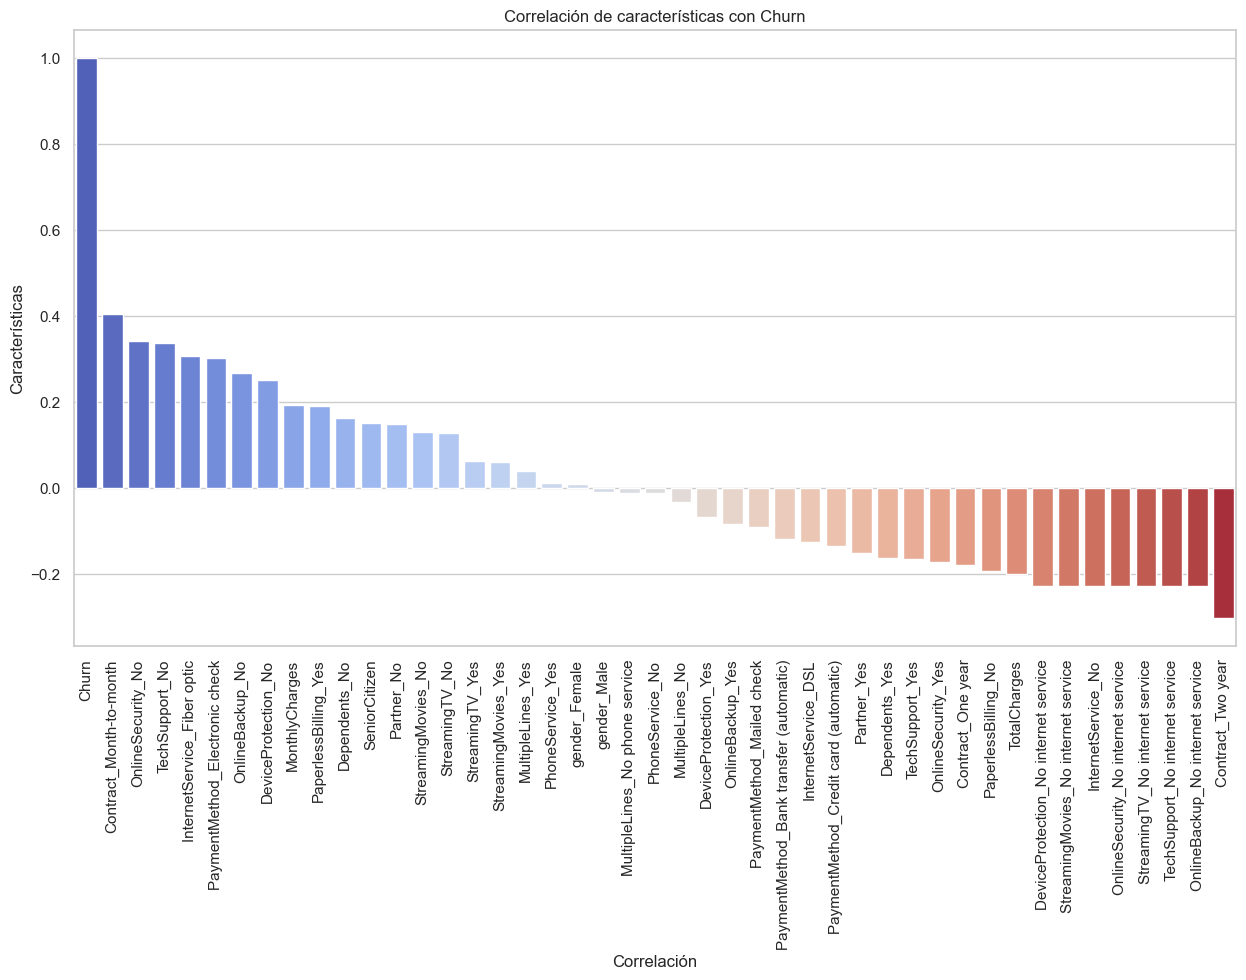

In [13]:
# ver corelaciones en diagrama de barras
plt.figure(figsize=(15,8))
data_corr =pd.DataFrame( df_encoded.corr()['Churn'].sort_values(ascending=False)[:-1]).reset_index()
sns.barplot(y='Churn', x='index', data=data_corr, palette='coolwarm')
plt.xlabel('Correlación')
plt.ylabel('Características')
plt.title('Correlación de características con Churn')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Escalamos los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_prepocessing_scaled = pd.DataFrame(scaler.fit_transform(df_prepocessing), columns=df_prepocessing.columns)
df_prepocessing_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


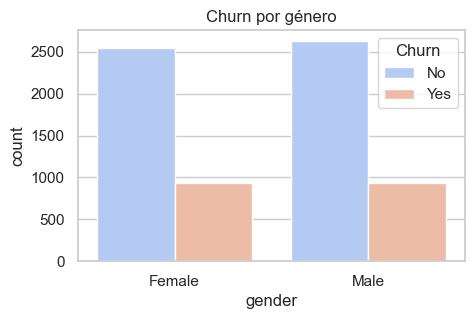

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(x='gender', hue='Churn', data=df_churn, palette='coolwarm')
plt.title('Churn por género')
plt.show()

In [19]:
columns_cat = df_sin_nulos.select_dtypes(include='object').columns


In [20]:
columns_cat

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

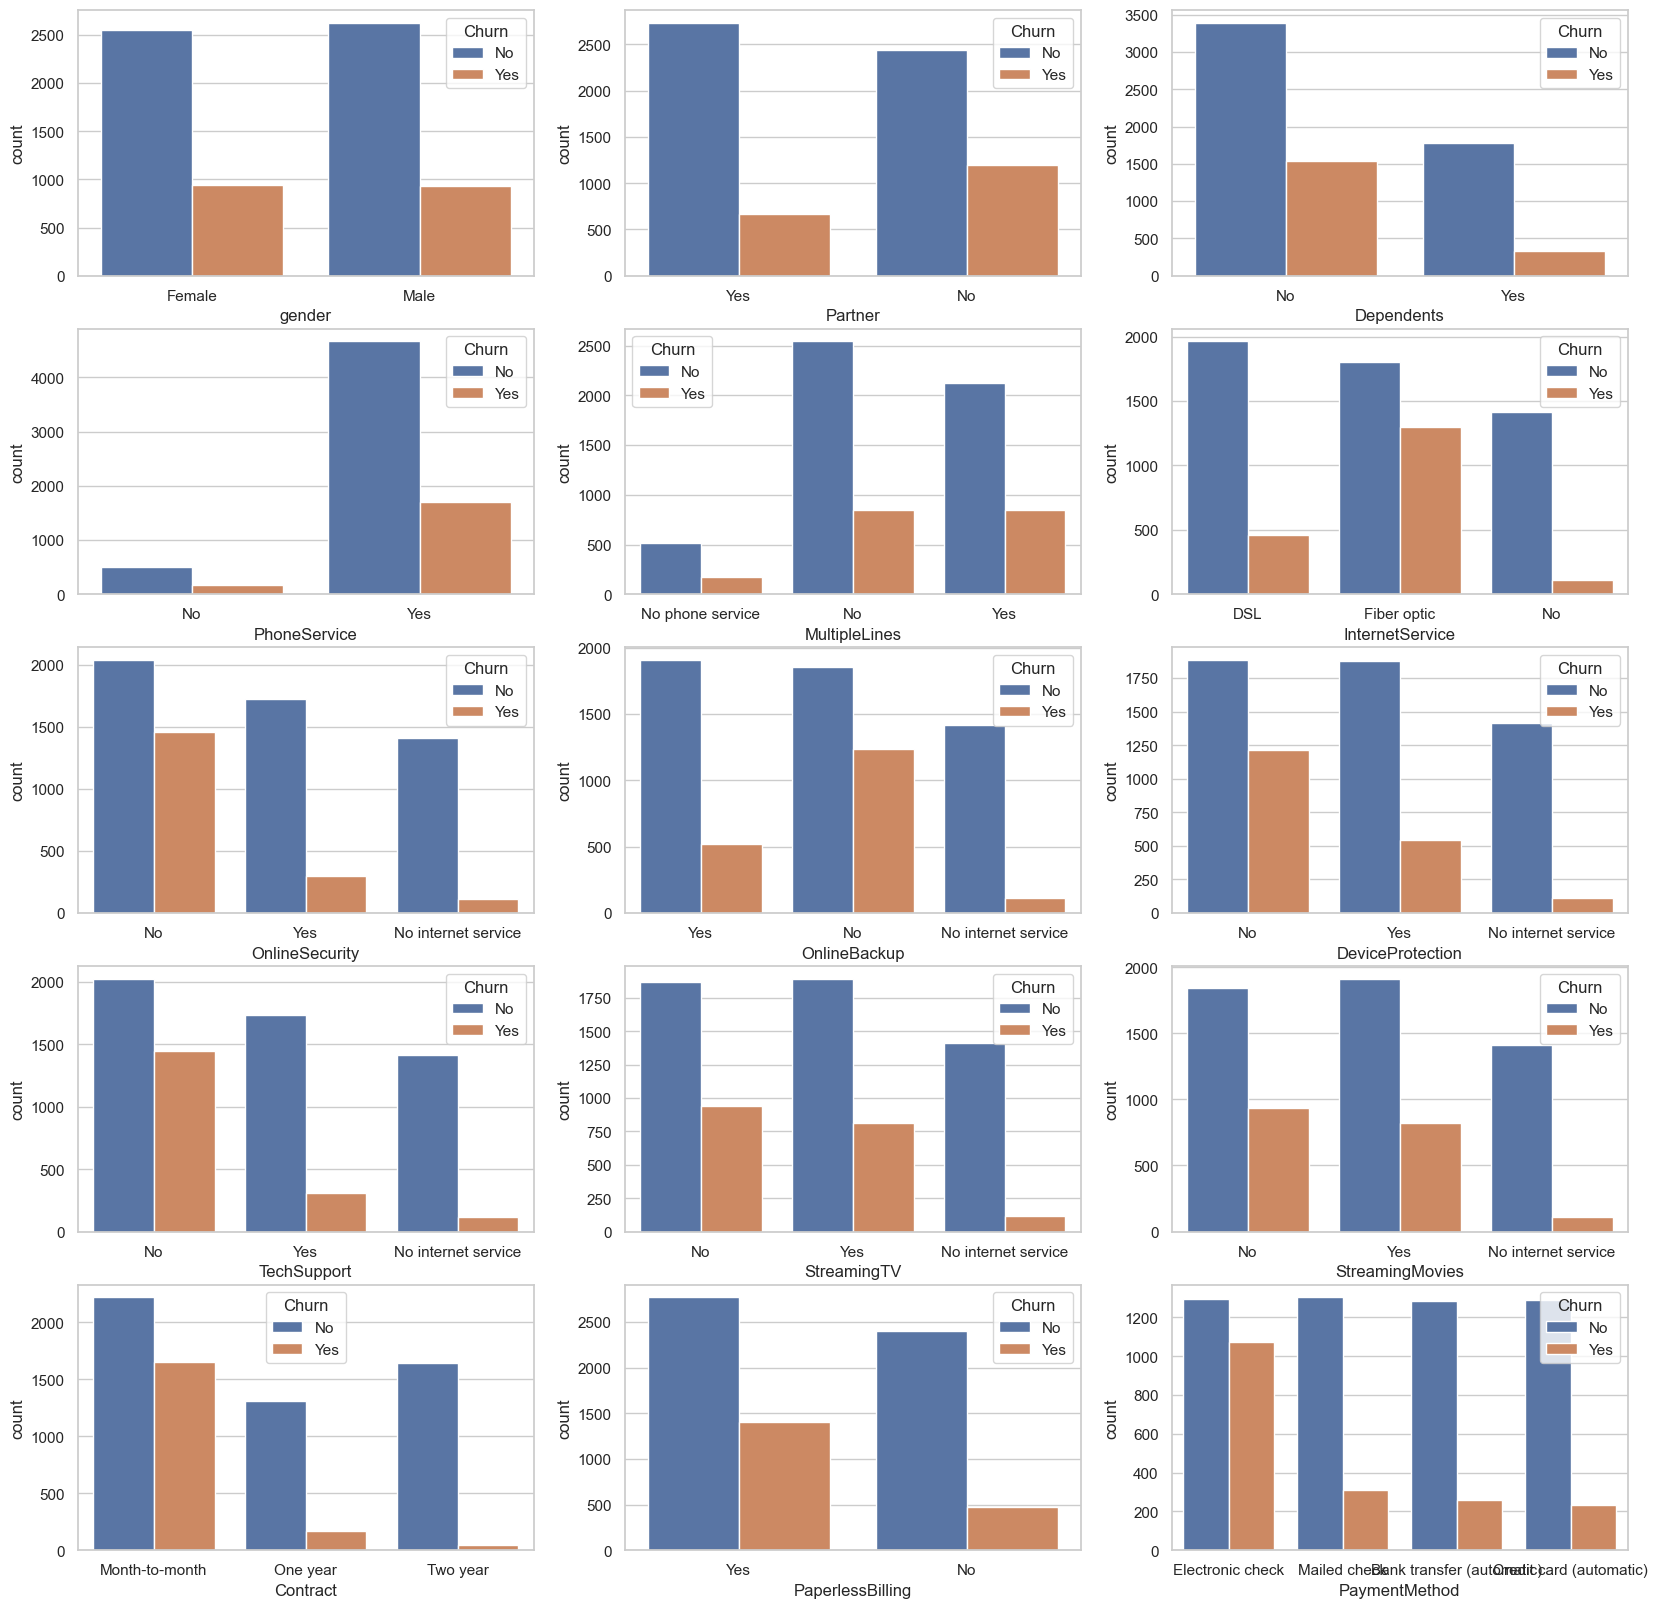

In [21]:

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=df_churn, x=var,hue='Churn', ax=ax)

<Figure size 1000x500 with 0 Axes>

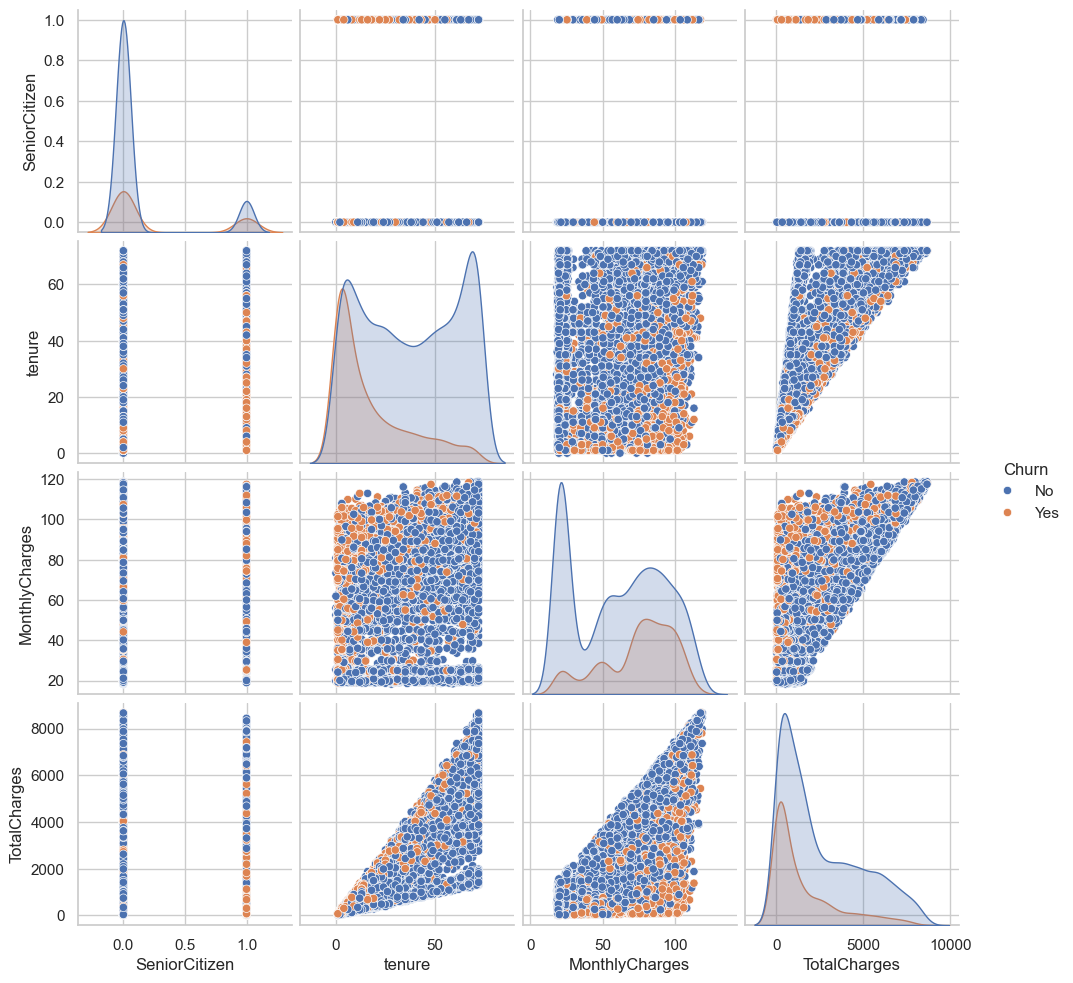

In [17]:
plt.figure(figsize=(10,5))
sns.pairplot(data=df_churn, hue='Churn')
plt.show()

In [37]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

## Creando modelo con scikit-learn

In [3]:
# trayendo el modelo
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
# es posible que sea necesario escalar los datos or cambiar el solver

NameError: name 'x_train' is not defined

## Análisis de resultados

In [2]:
predictions = logistic.predict(x_test)
cm = confusion_matrix(y_test,predictions)
cm

NameError: name 'logistic' is not defined

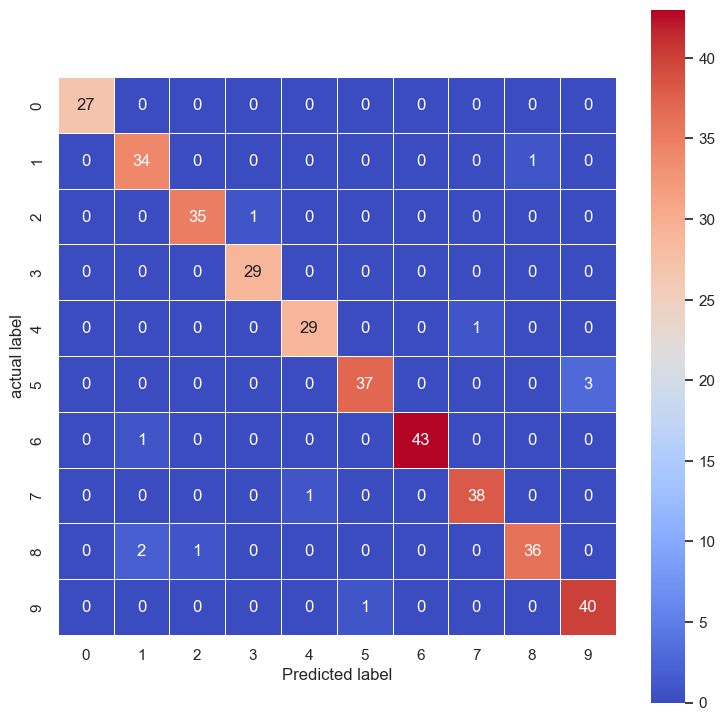

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='coolwarm')
plt.ylabel('actual label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
# calcular r2
r2 = regresor.score(X_std, y_std)
r2

0.9271098389904927

In [33]:
# calculo de la pendiente y la intersección
pendiente = regresor.coef_[0]
interseccion = regresor.intercept_
print(f'Pendiente: {pendiente[0]:.2f}') 
print(f'Intersección: {interseccion[0]:.2f}')


Pendiente: 0.96
Intersección: 0.00


## Generando predicción con el modelo

In [32]:
# Predicción
# se quiere saber la longitud del petalo de una flor con ancho de petalo de 2cm
petal_width = 2 #cm
petal_width_std = estandar_x.transform(np.array([petal_width]).reshape(-1,1))
petal_length_std = regresor.predict(petal_width_std)
#se aplica transformada inversa
print("La longitud del petalo de una flor con ancho de petalo 2cm es de ",estandar_y.inverse_transform( petal_length_std)[0])

La longitud del petalo de una flor con ancho de petalo 2cm es de  [5.54343902]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e4be8b6-6c74-4684-9aa7-992eab9b3282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>